In [1]:
import matplotlib.pyplot as plt
from openmmtools.constants import kB
from simtk.openmm import unit
import numpy as np

temperature = 300.0 * unit.kelvin
kT = kB * temperature
beta = 1.0/kT


In [36]:
T_max = 600.0 * unit.kelvin 
beta_m = 1.0 / (kB * T_max)

In [37]:
np.sqrt(beta_m/beta)

0.7071067811865476

In [38]:
functions = {'lambda_rest_bonds': lambda x : -2 * (1 - np.sqrt(beta_m / beta)) * x + 1 if x < 0.5 else 2 * (1 - np.sqrt(beta_m / beta)) * x - 1 + 2 * np.sqrt(beta_m / beta)}

In [45]:
x = 0.49
-2 * (1 - np.sqrt(beta_m / beta)) * x + 1

0.7129646455628167

In [46]:
x = 0.5
2 * (1 - np.sqrt(beta_m / beta)) * x - 1 + 2 * np.sqrt(beta_m / beta)

0.7071067811865476

In [47]:
x = 0.51
2 * (1 - np.sqrt(beta_m / beta)) * x - 1 + 2 * np.sqrt(beta_m / beta)

0.7129646455628167

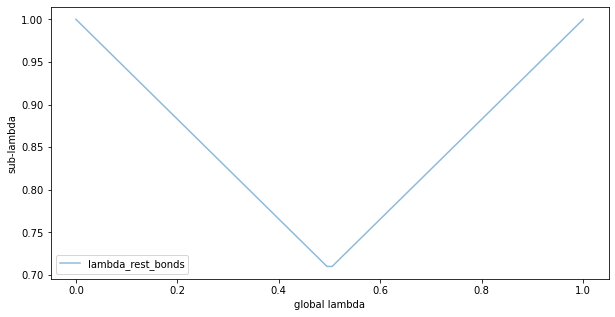

In [14]:
fig = plt.figure(figsize=(10,5))

global_lambda = np.linspace(0.,1.,100)
for f in functions:
    plt.plot(global_lambda, [functions[f](l) for l in global_lambda], alpha=0.5, label=f)

plt.xlabel('global lambda')
plt.ylabel('sub-lambda')
plt.legend()
plt.show()

In [15]:
[functions[f](l) for l in global_lambda]

[1.0,
 0.9940829652764959,
 0.9881659305529918,
 0.9822488958294877,
 0.9763318611059837,
 0.9704148263824796,
 0.9644977916589754,
 0.9585807569354714,
 0.9526637222119673,
 0.9467466874884632,
 0.9408296527649591,
 0.934912618041455,
 0.928995583317951,
 0.9230785485944468,
 0.9171615138709427,
 0.9112444791474387,
 0.9053274444239345,
 0.8994104097004305,
 0.8934933749769264,
 0.8875763402534222,
 0.8816593055299182,
 0.8757422708064141,
 0.86982523608291,
 0.8639082013594059,
 0.8579911666359019,
 0.8520741319123978,
 0.8461570971888936,
 0.8402400624653896,
 0.8343230277418855,
 0.8284059930183814,
 0.8224889582948773,
 0.8165719235713732,
 0.8106548888478691,
 0.804737854124365,
 0.7988208194008609,
 0.7929037846773568,
 0.7869867499538528,
 0.7810697152303487,
 0.7751526805068446,
 0.7692356457833405,
 0.7633186110598364,
 0.7574015763363323,
 0.7514845416128282,
 0.7455675068893242,
 0.73965047216582,
 0.7337334374423159,
 0.7278164027188119,
 0.7218993679953077,
 0.71598233327

In [3]:
from simtk import openmm
from simtk.openmm import unit

import openmmtools
from openmmtools.states import SamplerState, ThermodynamicState, CompoundThermodynamicState
from openmmtools.multistate import MultiStateReporter
from openmmtools import mcmc
from openmmtools import cache
from openmmtools.constants import kB

from perses.annihilation.lambda_protocol import RESTState, RESTCapableRelativeAlchemicalState
from perses.dispersed import feptasks

import pickle

In [4]:
def print_global_parameters(state):
    print("REST")
    print(state.lambda_rest_bonds)
    print(state.lambda_rest_angles)
    print(state.lambda_rest_torsions)
    print(state.lambda_rest_electrostatics)
    print(state.lambda_rest_electrostatics_exceptions)
    print(state.lambda_rest_sterics)
    print(state.lambda_rest_sterics_exceptions)
    print("ALCHEMICAL")
    print(state.lambda_alchemical_bonds_old)
    print(state.lambda_alchemical_bonds_new)
    print(state.lambda_alchemical_angles_old)
    print(state.lambda_alchemical_angles_new)
    print(state.lambda_alchemical_torsions_old)
    print(state.lambda_alchemical_torsions_new)
    print(state.lambda_alchemical_electrostatics_old)
    print(state.lambda_alchemical_electrostatics_new)
    print(state.lambda_alchemical_electrostatics_exceptions_old)
    print(state.lambda_alchemical_electrostatics_exceptions_new)
    print(state.lambda_alchemical_sterics_old)
    print(state.lambda_alchemical_sterics_new)
    print(state.lambda_alchemical_sterics_exceptions_old)
    print(state.lambda_alchemical_sterics_exceptions_new)
    print(state.lambda_alchemical_electrostatics_reciprocal)

In [5]:
with open("/data/chodera/zhangi/perses_benchmark/repex/32/3/11/11_apo.pickle", "rb") as f:
    htf = pickle.load(f)
    hybrid_system = htf.hybrid_system

DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=6)
           2	LOAD_GLOBAL(arg=0, lineno=6)
           4	LOAD_METHOD(arg=1, lineno=6)
           6	LOAD_CONST(arg=1, lineno=6)
           8	CALL_METHOD(arg=1, lineno=6)
          10	STORE_FAST(arg=2, lineno=6)
          12	LOAD_FAST(arg=0, lineno=7)
          14	LOAD_CONST(arg=2, lineno=7)
          16	BINARY_SUBSCR(arg=None, lineno=7)
          18	LOAD_FAST(arg=1, lineno=7)
          20	LOAD_CONST(arg=3, lineno=7)
          22	BINARY_SUBSCR(arg=None, lineno=7)
          24	BINARY_MULTIPLY(arg=None, lineno=7)
          26	LOAD_FAST(arg=0, lineno=7)
          28	LOAD_CONST(arg=3, lineno=7)
          30	BINARY_SUBSCR(arg=None, lineno=7)
          32	LOAD_FAST(arg=1, lineno=7)
          34	LOAD_CONST(arg=2, lineno=7)
          36	BINARY_SUBSCR(arg=None, lineno=7)
          38	BINARY_MULTIPLY(arg=None, lineno=7)
          40	BINARY_SUBTRACT(arg=None, lineno=7)
          42	LOAD_FAST(arg=2, lineno=7)
          44	LO

DEBUG:numba.core.byteflow:dispatch pc=74, inst=BINARY_MULTIPLY(arg=None, lineno=8)
DEBUG:numba.core.byteflow:stack ['$60binary_multiply.27', '$66binary_subscr.30', '$72binary_subscr.33']
DEBUG:numba.core.byteflow:dispatch pc=76, inst=BINARY_SUBTRACT(arg=None, lineno=8)
DEBUG:numba.core.byteflow:stack ['$60binary_multiply.27', '$74binary_multiply.34']
DEBUG:numba.core.byteflow:dispatch pc=78, inst=LOAD_FAST(arg=2, lineno=8)
DEBUG:numba.core.byteflow:stack ['$76binary_subtract.35']
DEBUG:numba.core.byteflow:dispatch pc=80, inst=LOAD_CONST(arg=2, lineno=8)
DEBUG:numba.core.byteflow:stack ['$76binary_subtract.35', '$c78.36']
DEBUG:numba.core.byteflow:dispatch pc=82, inst=STORE_SUBSCR(arg=None, lineno=8)
DEBUG:numba.core.byteflow:stack ['$76binary_subtract.35', '$c78.36', '$const80.37']
DEBUG:numba.core.byteflow:dispatch pc=84, inst=LOAD_FAST(arg=0, lineno=9)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=86, inst=LOAD_CONST(arg=4, lineno=9)
DEBUG:numba.core.bytefl

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2b01ec49ce80>
DEBUG:numba.core.ssa:on stmt: a = arg(0, name=a)
DEBUG:numba.core.ssa:on stmt: b = arg(1, name=b)
DEBUG:numba.core.ssa:on stmt: $2load_global.0 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-rest-over-protocol/lib/python3.8/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=zeros)
DEBUG:numba.core.ssa:on stmt: $const6.2 = const(int, 3)
DEBUG:numba.core.ssa:on stmt: c = call $4load_method.1($const6.2, func=$4load_method.1, args=[Var($const6.2, coordinate_numba.py:6)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $const14.5 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: $16binary_subscr.6 = static_getitem(value=a, index=1, index_var=$const14.5, fn=<built-in function getitem>)
DEBUG:numba.core.ssa:on stmt: $const20.8 = const(int, 2)
DEBUG:numba.core.s

DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=0, inst=NOP(arg=None, lineno=14)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=14)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_METHOD(arg=1, lineno=14)
DEBUG:numba.core.byteflow:stack ['$2load_global.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=14)
DEBUG:numba.core.byteflow:stack ['$4load_method.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=LOAD_FAST(arg=0, lineno=14)
DEBUG:numba.core.byteflow:stack ['$4load_method.1', '$a6.2']
DEBUG:numba.core.byteflow:dispatch pc=10, inst=CALL_METHOD(arg=2, lineno=14)
DEBUG:numba.core.byteflow:stack ['$4load_method.1', '$a6.2', '$a8.3']
DEBUG:numba.core.byteflow:dispatch pc=12, inst=STORE_FAST(arg=1, lineno=14)
DEBUG:numba.core.byteflow:stack ['$10call_method.4']
D

DEBUG:numba.core.byteflow:stack ['$b10.4']
DEBUG:numba.core.byteflow:dispatch pc=14, inst=UNPACK_SEQUENCE(arg=1, lineno=509)
DEBUG:numba.core.byteflow:stack ['$12load_attr.5']
DEBUG:numba.core.byteflow:dispatch pc=16, inst=STORE_FAST(arg=3, lineno=509)
DEBUG:numba.core.byteflow:stack ['$14unpack_sequence.6']
DEBUG:numba.core.byteflow:dispatch pc=18, inst=LOAD_FAST(arg=2, lineno=510)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=20, inst=LOAD_FAST(arg=3, lineno=510)
DEBUG:numba.core.byteflow:stack ['$m18.8']
DEBUG:numba.core.byteflow:dispatch pc=22, inst=COMPARE_OP(arg=3, lineno=510)
DEBUG:numba.core.byteflow:stack ['$m18.8', '$n20.9']
DEBUG:numba.core.byteflow:dispatch pc=24, inst=POP_JUMP_IF_FALSE(arg=34, lineno=510)
DEBUG:numba.core.byteflow:stack ['$22compare_op.10']
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=26, stack=(), blockstack=(), npush=0), Edge(pc=34, stack=(), blockstack=(), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_ini

DEBUG:numba.core.ssa:defs defaultdict(<class 'list'>,
            {'$12load_attr.5': [<numba.core.ir.Assign object at 0x2b01ec6e0af0>],
             '$14unpack_sequence.7': [<numba.core.ir.Assign object at 0x2b01ec6e0c70>],
             '$22compare_op.10': [<numba.core.ir.Assign object at 0x2b01ec6e72b0>],
             '$24pred': [<numba.core.ir.Assign object at 0x2b01ec6e7550>],
             '$26load_global.0': [<numba.core.ir.Assign object at 0x2b01ec6e7130>],
             '$30call_function.2': [<numba.core.ir.Assign object at 0x2b01ec6e78e0>],
             '$36return_value.1': [<numba.core.ir.Assign object at 0x2b01ec6e7d30>],
             '$4load_attr.1': [<numba.core.ir.Assign object at 0x2b01ec6e0490>],
             '$6unpack_sequence.3': [<numba.core.ir.Assign object at 0x2b01ec6e0610>],
             '$const28.1': [<numba.core.ir.Assign object at 0x2b01ec6e7730>],
             '$const34.0': [<numba.core.ir.Assign object at 0x2b01ec6e7bb0>],
             'a': [<numba.core.ir.Assi

DEBUG:numba.core.ssa:on stmt: return $20return_value.1
DEBUG:numba.core.ssa:defs defaultdict(<class 'list'>,
            {'$10load_global.0': [<numba.core.ir.Assign object at 0x2b01ec671fa0>],
             '$14call_function.2': [<numba.core.ir.Assign object at 0x2b01ec66ed30>],
             '$20return_value.1': [<numba.core.ir.Assign object at 0x2b01ec66ee80>],
             '$4load_deref.1': [<numba.core.ir.Assign object at 0x2b01ec671220>],
             '$6compare_op.2': [<numba.core.ir.Assign object at 0x2b01ec6712b0>],
             '$8pred': [<numba.core.ir.Assign object at 0x2b01ec671a30>],
             '$const12.1': [<numba.core.ir.Assign object at 0x2b01ec66ef10>],
             '$const18.0': [<numba.core.ir.Assign object at 0x2b01ec66ec10>],
             'bool8': [<numba.core.ir.Assign object at 0x2b01ec671940>],
             'n': [<numba.core.ir.Assign object at 0x2b01ec671910>]})
DEBUG:numba.core.ssa:SSA violators set()
DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(

DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=0, inst=NOP(arg=None, lineno=22)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=22)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=22)
DEBUG:numba.core.byteflow:stack ['$2load_global.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=22)
DEBUG:numba.core.byteflow:stack ['$2load_global.0', '$axis4.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=STORE_FAST(arg=2, lineno=22)
DEBUG:numba.core.byteflow:stack ['$6call_function.2']
DEBUG:numba.core.byteflow:dispatch pc=10, inst=LOAD_GLOBAL(arg=1, lineno=23)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=12, inst=LOAD_CONST(arg=1, lineno=23)
DEBUG:numba.core.byteflow:stack ['$10load_global.3']
DEBUG:numba.core.byteflow:di

DEBUG:numba.core.byteflow:dispatch pc=128, inst=LOAD_FAST(arg=0, lineno=32)
DEBUG:numba.core.byteflow:stack ['$126binary_multiply.38']
DEBUG:numba.core.byteflow:dispatch pc=130, inst=LOAD_CONST(arg=2, lineno=32)
DEBUG:numba.core.byteflow:stack ['$126binary_multiply.38', '$axis128.39']
DEBUG:numba.core.byteflow:dispatch pc=132, inst=BINARY_SUBSCR(arg=None, lineno=32)
DEBUG:numba.core.byteflow:stack ['$126binary_multiply.38', '$axis128.39', '$const130.40']
DEBUG:numba.core.byteflow:dispatch pc=134, inst=LOAD_FAST(arg=6, lineno=32)
DEBUG:numba.core.byteflow:stack ['$126binary_multiply.38', '$132binary_subscr.41']
DEBUG:numba.core.byteflow:dispatch pc=136, inst=BINARY_MULTIPLY(arg=None, lineno=32)
DEBUG:numba.core.byteflow:stack ['$126binary_multiply.38', '$132binary_subscr.41', '$sin_angle134.42']
DEBUG:numba.core.byteflow:dispatch pc=138, inst=BINARY_SUBTRACT(arg=None, lineno=32)
DEBUG:numba.core.byteflow:stack ['$126binary_multiply.38', '$136binary_multiply.43']
DEBUG:numba.core.byteflo

DEBUG:numba.core.byteflow:stack ['$cos_angle226.85', '$232binary_subscr.88']
DEBUG:numba.core.byteflow:dispatch pc=236, inst=LOAD_FAST(arg=5, lineno=36)
DEBUG:numba.core.byteflow:stack ['$cos_angle226.85', '$232binary_subscr.88', '$const234.89']
DEBUG:numba.core.byteflow:dispatch pc=238, inst=BINARY_SUBTRACT(arg=None, lineno=36)
DEBUG:numba.core.byteflow:stack ['$cos_angle226.85', '$232binary_subscr.88', '$const234.89', '$cos_angle236.90']
DEBUG:numba.core.byteflow:dispatch pc=240, inst=BINARY_MULTIPLY(arg=None, lineno=36)
DEBUG:numba.core.byteflow:stack ['$cos_angle226.85', '$232binary_subscr.88', '$238binary_subtract.91']
DEBUG:numba.core.byteflow:dispatch pc=242, inst=BINARY_ADD(arg=None, lineno=36)
DEBUG:numba.core.byteflow:stack ['$cos_angle226.85', '$240binary_multiply.92']
DEBUG:numba.core.byteflow:dispatch pc=244, inst=LOAD_FAST(arg=7, lineno=36)
DEBUG:numba.core.byteflow:stack ['$242binary_add.93']
DEBUG:numba.core.byteflow:dispatch pc=246, inst=LOAD_CONST(arg=12, lineno=36)
D

DEBUG:numba.core.byteflow:stack ['$334binary_subscr.136', '$axis336.137', '$const338.138']
DEBUG:numba.core.byteflow:dispatch pc=342, inst=BINARY_MULTIPLY(arg=None, lineno=40)
DEBUG:numba.core.byteflow:stack ['$334binary_subscr.136', '$340binary_subscr.139']
DEBUG:numba.core.byteflow:dispatch pc=344, inst=LOAD_CONST(arg=6, lineno=40)
DEBUG:numba.core.byteflow:stack ['$342binary_multiply.140']
DEBUG:numba.core.byteflow:dispatch pc=346, inst=LOAD_FAST(arg=5, lineno=40)
DEBUG:numba.core.byteflow:stack ['$342binary_multiply.140', '$const344.141']
DEBUG:numba.core.byteflow:dispatch pc=348, inst=BINARY_SUBTRACT(arg=None, lineno=40)
DEBUG:numba.core.byteflow:stack ['$342binary_multiply.140', '$const344.141', '$cos_angle346.142']
DEBUG:numba.core.byteflow:dispatch pc=350, inst=BINARY_MULTIPLY(arg=None, lineno=40)
DEBUG:numba.core.byteflow:stack ['$342binary_multiply.140', '$348binary_subtract.143']
DEBUG:numba.core.byteflow:dispatch pc=352, inst=LOAD_FAST(arg=0, lineno=40)
DEBUG:numba.core.byt

DEBUG:numba.core.byteflow:changing phismap: defaultdict(<class 'set'>,
            {'$phi18.0': {('$16get_iter.6',
                           State(pc_initial=0 nstack_initial=0))},
             '$phi20.0': {('$16get_iter.6',
                           State(pc_initial=0 nstack_initial=0))},
             '$phi20.1': {('$18for_iter.2',
                           State(pc_initial=18 nstack_initial=1))}})
DEBUG:numba.core.byteflow:keep phismap: {'$phi18.0': {('$16get_iter.6', State(pc_initial=0 nstack_initial=0))},
 '$phi20.1': {('$18for_iter.2', State(pc_initial=18 nstack_initial=1))}}
DEBUG:numba.core.byteflow:new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=0 nstack_initial=0): {'$phi18.0': '$16get_iter.6'},
             State(pc_initial=18 nstack_initial=1): {'$phi20.1': '$18for_iter.2'}})
DEBUG:numba.core.byteflow:----------------------DONE Prune PHIs-----------------------
DEBUG:numba.core.byteflow:block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(in

DEBUG:numba.core.interpreter:label 0:
    axis = arg(0, name=axis)                 ['axis']
    angle = arg(1, name=angle)               ['angle']
    $2load_global.0 = global(_norm: CPUDispatcher(<function _norm at 0x2b01ebfa6ca0>)) ['$2load_global.0']
    axis_norm = call $2load_global.0(axis, func=$2load_global.0, args=[Var(axis, coordinate_numba.py:22)], kws=(), vararg=None) ['$2load_global.0', 'axis', 'axis_norm']
    $10load_global.3 = global(range: <class 'range'>) ['$10load_global.3']
    $const12.4 = const(int, 3)               ['$const12.4']
    $14call_function.5 = call $10load_global.3($const12.4, func=$10load_global.3, args=[Var($const12.4, coordinate_numba.py:23)], kws=(), vararg=None) ['$10load_global.3', '$14call_function.5', '$const12.4']
    $16get_iter.6 = getiter(value=$14call_function.5) ['$14call_function.5', '$16get_iter.6']
    $phi18.0 = $16get_iter.6                 ['$16get_iter.6', '$phi18.0']
    jump 18                                  []
label 18:
    $18

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2b01ec79d040>
DEBUG:numba.core.ssa:on stmt: axis = arg(0, name=axis)
DEBUG:numba.core.ssa:on stmt: angle = arg(1, name=angle)
DEBUG:numba.core.ssa:on stmt: $2load_global.0 = global(_norm: CPUDispatcher(<function _norm at 0x2b01ebfa6ca0>))
DEBUG:numba.core.ssa:on stmt: axis_norm = call $2load_global.0(axis, func=$2load_global.0, args=[Var(axis, coordinate_numba.py:22)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $10load_global.3 = global(range: <class 'range'>)
DEBUG:numba.core.ssa:on stmt: $const12.4 = const(int, 3)
DEBUG:numba.core.ssa:on stmt: $14call_function.5 = call $10load_global.3($const12.4, func=$10load_global.3, args=[Var($const12.4, coordinate_numba.py:23)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $16get_iter.6 = getiter(value=$14call_function.5)
DEBUG:numba.core.ssa:on stmt: $phi18.0 = $16get_iter.6
DEBUG:numba.core.ssa:on stm

DEBUG:numba.core.ssa:on stmt: $198binary_multiply.72 = $190binary_subscr.68 * $196binary_subscr.71
DEBUG:numba.core.ssa:on stmt: $const200.73 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: $204binary_subtract.75 = $const200.73 - cos_angle
DEBUG:numba.core.ssa:on stmt: $206binary_multiply.76 = $198binary_multiply.72 * $204binary_subtract.75
DEBUG:numba.core.ssa:on stmt: $const210.78 = const(int, 2)
DEBUG:numba.core.ssa:on stmt: $212binary_subscr.79 = static_getitem(value=axis, index=2, index_var=$const210.78, fn=<built-in function getitem>)
DEBUG:numba.core.ssa:on stmt: $216binary_multiply.81 = $212binary_subscr.79 * sin_angle
DEBUG:numba.core.ssa:on stmt: $218binary_add.82 = $206binary_multiply.76 + $216binary_multiply.81
DEBUG:numba.core.ssa:on stmt: $const_1.1 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: $const_0.4 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $const222.84 = build_tuple(items=[Var($const_1.1, coordinate_numba.py:35), Var($const_0.4, coordinate_numba.py:35)])
DEBU

DEBUG:numba.core.ssa:SSA violators set()
DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=22)
           2	LOAD_FAST(arg=0, lineno=22)
           4	LOAD_CONST(arg=1, lineno=1)
           6	BINARY_POWER(arg=None, lineno=1)
           8	RETURN_VALUE(arg=None, lineno=1)
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=0, inst=NOP(arg=None, lineno=22)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=22)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_CONST(arg=1, lineno=1)
DEBUG:numba.core.byteflow:stack ['$axis_12.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=BINARY_POWER(arg=None, lineno=1)
DEBUG:numba.core.byteflow:stack ['$axis_12.0', '$const4.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=RETURN_VALUE(arg=None, lineno=1)
DEBUG:numba.core.byteflow:stack ['$

DEBUG:numba.core.byteflow:stack ['$6call_function.2']
DEBUG:numba.core.byteflow:dispatch pc=10, inst=LOAD_DEREF(arg=1, lineno=218)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=218)
DEBUG:numba.core.byteflow:stack ['$10load_deref.3']
DEBUG:numba.core.byteflow:dispatch pc=14, inst=CALL_FUNCTION(arg=1, lineno=218)
DEBUG:numba.core.byteflow:stack ['$10load_deref.3', '$a12.4']
DEBUG:numba.core.byteflow:dispatch pc=16, inst=STORE_FAST(arg=0, lineno=218)
DEBUG:numba.core.byteflow:stack ['$14call_function.5']
DEBUG:numba.core.byteflow:dispatch pc=18, inst=LOAD_FAST(arg=1, lineno=219)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=20, inst=LOAD_CONST(arg=2, lineno=219)
DEBUG:numba.core.byteflow:stack ['$b18.6']
DEBUG:numba.core.byteflow:dispatch pc=22, inst=COMPARE_OP(arg=0, lineno=219)
DEBUG:numba.core.byteflow:stack ['$b18.6', '$const20.7']
DEBUG:numba.core.byteflow:dispatch pc=24, inst=POP_JUMP_IF_FALSE(ar

DEBUG:numba.core.byteflow:stack ['$exp130.0']
DEBUG:numba.core.byteflow:dispatch pc=134, inst=COMPARE_OP(arg=3, lineno=238)
DEBUG:numba.core.byteflow:stack ['$exp130.0', '$const132.1']
DEBUG:numba.core.byteflow:dispatch pc=136, inst=POP_JUMP_IF_FALSE(arg=172, lineno=238)
DEBUG:numba.core.byteflow:stack ['$134compare_op.2']
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=138, stack=(), blockstack=(), npush=0), Edge(pc=172, stack=(), blockstack=(), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=60 nstack_initial=0), State(pc_initial=76 nstack_initial=0), State(pc_initial=138 nstack_initial=0), State(pc_initial=172 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=60, inst=LOAD_DEREF(arg=2, lineno=226)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=62, inst=POP_JUMP_IF_FALSE(arg=68, lineno=226)
DEBUG:numba.core.byteflow:stack ['$60load_deref.0']
DEBUG:numba.core.byteflow:end state. edges=[Edge(

DEBUG:numba.core.byteflow:dispatch pc=160, inst=STORE_FAST(arg=4, lineno=241)
DEBUG:numba.core.byteflow:stack ['$158inplace_rshift.2']
DEBUG:numba.core.byteflow:dispatch pc=162, inst=LOAD_FAST(arg=0, lineno=242)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=164, inst=LOAD_FAST(arg=0, lineno=242)
DEBUG:numba.core.byteflow:stack ['$a162.3']
DEBUG:numba.core.byteflow:dispatch pc=166, inst=INPLACE_MULTIPLY(arg=None, lineno=242)
DEBUG:numba.core.byteflow:stack ['$a162.3', '$a164.4']
DEBUG:numba.core.byteflow:dispatch pc=168, inst=STORE_FAST(arg=0, lineno=242)
DEBUG:numba.core.byteflow:stack ['$166inplace_multiply.5']
DEBUG:numba.core.byteflow:dispatch pc=170, inst=JUMP_ABSOLUTE(arg=130, lineno=242)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=130, stack=(), blockstack=(), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=176 nstack_initial=0), State(pc_initial=184 nstack_initial=0), State(pc_initial=92 n

DEBUG:numba.core.byteflow:block_infos State(pc_initial=84 nstack_initial=0):
AdaptBlockInfo(insts=((84, {'res': '$a84.0'}), (86, {'res': '$const86.1'}), (88, {'lhs': '$a84.0', 'rhs': '$const86.1', 'res': '$88compare_op.2'}), (90, {'pred': '$88compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={92: (), 106: ()})
DEBUG:numba.core.byteflow:block_infos State(pc_initial=92 nstack_initial=0):
AdaptBlockInfo(insts=((92, {'res': '$const92.0'}), (94, {'retval': '$const92.0', 'castval': '$94return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
DEBUG:numba.core.byteflow:block_infos State(pc_initial=98 nstack_initial=0):
AdaptBlockInfo(insts=((98, {'res': '$const98.0'}), (100, {'value': '$const98.0'}), (102, {'res': '$b102.1'}), (104, {'value': '$b102.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={106: ()})
DEBUG:numba.core.byteflow:block_infos State(pc_initial=106 nstack_i

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2b01ec872670>
DEBUG:numba.core.ssa:on stmt: a = arg(0, name=a)
DEBUG:numba.core.ssa:on stmt: b = arg(1, name=b)
DEBUG:numba.core.ssa:on stmt: $2load_deref.0 = freevar(tp: float64)
DEBUG:numba.core.ssa:on stmt: $const4.1 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:217)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $10load_deref.3 = freevar(tp: float64)
DEBUG:numba.core.ssa:on stmt: a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:217)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $const20.7 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $22compare_op.8 = b < $const20.7
DEBUG:numba.core.ssa:on stmt: bool24 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $24pred = call bool24($22compare_op.8, func=bool24, args=(Var($22c

DEBUG:numba.core.ssa:SSA violators {'a.1', 'exp', 'invert', 'r'}
DEBUG:numba.core.ssa:Fix SSA violator on var a.1
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b01ec872670>
DEBUG:numba.core.ssa:on stmt: a = arg(0, name=a)
DEBUG:numba.core.ssa:on stmt: b = arg(1, name=b)
DEBUG:numba.core.ssa:on stmt: $2load_deref.0 = freevar(tp: float64)
DEBUG:numba.core.ssa:on stmt: $const4.1 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:217)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $10load_deref.3 = freevar(tp: float64)
DEBUG:numba.core.ssa:on stmt: a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:217)], kws=(), vararg=None)
DEBUG:numba.core.ssa:first assign: a.1
DEBUG:numba.core.ssa:replaced with: a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:217)], kws=(), vararg=

DEBUG:numba.core.ssa:==== SSA block rewrite pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b01ec8722e0>
DEBUG:numba.core.ssa:on stmt: a = arg(0, name=a)
DEBUG:numba.core.ssa:on stmt: b = arg(1, name=b)
DEBUG:numba.core.ssa:on stmt: $2load_deref.0 = freevar(tp: float64)
DEBUG:numba.core.ssa:on stmt: $const4.1 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: r = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:217)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $10load_deref.3 = freevar(tp: float64)
DEBUG:numba.core.ssa:on stmt: a.1 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:217)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $const20.7 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $22compare_op.8 = b < $const20.7
DEBUG:numba.core.ssa:on stmt: bool24 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $24pred = call bool24($22compare_op.8, func=bool24, args=(Var($22compare_o

DEBUG:numba.core.ssa:find_def var='a.1' stmt=$166inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)
DEBUG:numba.core.ssa:find_def_from_top label 154
DEBUG:numba.core.ssa:idom 138 from label 154
DEBUG:numba.core.ssa:find_def_from_bottom label 138
DEBUG:numba.core.ssa:find_def_from_top label 138
DEBUG:numba.core.ssa:idom 130 from label 138
DEBUG:numba.core.ssa:find_def_from_bottom label 130
DEBUG:numba.core.ssa:replaced with: $166inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1.2, rhs=a.1.2, static_lhs=Undefined, static_rhs=Undefined)
DEBUG:numba.core.ssa:on stmt: a.1.1 = $166inplace_multiply.5
DEBUG:numba.core.ssa:on stmt: jump 130
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 172
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b01ec8722e0>
DEBUG:numba.core.ssa:on stmt: bool174 = global(b

DEBUG:numba.core.ssa:==== SSA block rewrite pass on 154
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b01ec872a90>
DEBUG:numba.core.ssa:on stmt: $const156.1 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: $158inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp, rhs=$const156.1, static_lhs=Undefined, static_rhs=Undefined)
DEBUG:numba.core.ssa:on stmt: exp = $158inplace_rshift.2
DEBUG:numba.core.ssa:replaced with: exp.2 = $158inplace_rshift.2
DEBUG:numba.core.ssa:on stmt: $166inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1.2, rhs=a.1.2, static_lhs=Undefined, static_rhs=Undefined)
DEBUG:numba.core.ssa:on stmt: a.1.1 = $166inplace_multiply.5
DEBUG:numba.core.ssa:on stmt: jump 130
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 172
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b01ec872a90>
DEBUG:numba.core.ssa

DEBUG:numba.core.ssa:incoming_def exp.2 = $158inplace_rshift.2
DEBUG:numba.core.ssa:replaced with: $134compare_op.2 = exp.4 != $const132.1
DEBUG:numba.core.ssa:on stmt: bool136 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $136pred = call bool136($134compare_op.2, func=bool136, args=(Var($134compare_op.2, numbers.py:238),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $136pred, 138, 172
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 138
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b01ec8a5b50>
DEBUG:numba.core.ssa:on stmt: $const140.1 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: $142binary_and.2 = exp & $const140.1
DEBUG:numba.core.ssa:find_def var='exp' stmt=$142binary_and.2 = exp & $const140.1
DEBUG:numba.core.ssa:find_def_from_top label 138
DEBUG:numba.core.ssa:idom 130 from label 138
DEBUG:numba.core.ssa:find_def_from_bottom label 130
DEBUG:numba.core.ssa:replaced with: $142binary_and.2 = exp.4 & $const140.1
DEBUG:numba.cor

DEBUG:numba.core.ssa:on stmt: $116load_method.1 = getattr(value=$114load_global.0, attr=pow)
DEBUG:numba.core.ssa:on stmt: $120load_global.3 = global(float: <class 'float'>)
DEBUG:numba.core.ssa:on stmt: $124call_function.5 = call $120load_global.3(b, func=$120load_global.3, args=[Var(b, numbers.py:217)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $126call_method.6 = call $116load_method.1(a.1, $124call_function.5, func=$116load_method.1, args=[Var(a.1, numbers.py:218), Var($124call_function.5, numbers.py:237)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $128return_value.7 = cast(value=$126call_method.6)
DEBUG:numba.core.ssa:on stmt: return $128return_value.7
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 130
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b01ec872a60>
DEBUG:numba.core.ssa:on stmt: exp.4 = phi(incoming_values=[Var(exp.3, numbers.py:235), Var(exp.2, numbers.py:241)], incoming_blocks=[106, 154])
DEBUG:numba.core.ssa:on stmt

DEBUG:numba.core.ssa:on stmt: $114load_global.0 = global(math: <module 'math' from '/home/zhangi/miniconda3/envs/perses-rest-over-protocol/lib/python3.8/lib-dynload/math.cpython-38-x86_64-linux-gnu.so'>)
DEBUG:numba.core.ssa:on stmt: $116load_method.1 = getattr(value=$114load_global.0, attr=pow)
DEBUG:numba.core.ssa:on stmt: $120load_global.3 = global(float: <class 'float'>)
DEBUG:numba.core.ssa:on stmt: $124call_function.5 = call $120load_global.3(b, func=$120load_global.3, args=[Var(b, numbers.py:217)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $126call_method.6 = call $116load_method.1(a.1, $124call_function.5, func=$116load_method.1, args=[Var(a.1, numbers.py:218), Var($124call_function.5, numbers.py:237)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $128return_value.7 = cast(value=$126call_method.6)
DEBUG:numba.core.ssa:on stmt: return $128return_value.7
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 130
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars

DEBUG:numba.core.ssa:on stmt: $50pred = call bool50($48load_deref.0, func=bool50, args=(Var($48load_deref.0, numbers.py:224),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: jump 106
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 98
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b01ec8727f0>
DEBUG:numba.core.ssa:on stmt: invert.1 = const(bool, False)
DEBUG:numba.core.ssa:on stmt: exp.1 = b
DEBUG:numba.core.ssa:on stmt: jump 106
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 106
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b01ec8727f0>
DEBUG:numba.core.ssa:on stmt: invert.2 = phi(incoming_values=[Var(invert, numbers.py:220), Var(invert.1, numbers.py:233)], incoming_blocks=[48, 98])
DEBUG:numba.core.ssa:on stmt: exp.3 = phi(incoming_values=[Var(exp, numbers.py:221), Var(exp.1, numbers.py:234)], incoming_blocks=[48, 98])
DEBUG:numba.core.ssa:on stmt: $const108.1 = const(int, 65536)
DEBUG:numba.core.ssa:on stmt: $110c

DEBUG:numba.core.ssa:on stmt: $44load_global.0 = global(OverflowError: <class 'OverflowError'>)
DEBUG:numba.core.ssa:on stmt: <static> raise <class 'OverflowError'>
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 48
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b01ec8dde20>
DEBUG:numba.core.ssa:on stmt: $48load_deref.0 = freevar(is_integer: False)
DEBUG:numba.core.ssa:on stmt: bool50 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $50pred = call bool50($48load_deref.0, func=bool50, args=(Var($48load_deref.0, numbers.py:224),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: jump 106
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 98
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b01ec8dde20>
DEBUG:numba.core.ssa:on stmt: invert.1 = const(bool, False)
DEBUG:numba.core.ssa:on stmt: exp.1 = b
DEBUG:numba.core.ssa:on stmt: jump 106
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 106
DEBUG:numba.core.ssa:Running <num

DEBUG:numba.core.ssa:find_def_from_top label 172
DEBUG:numba.core.ssa:idom 130 from label 172
DEBUG:numba.core.ssa:find_def_from_bottom label 130
DEBUG:numba.core.ssa:replaced with: $180binary_true_divide.2 = $const176.0 / r.2
DEBUG:numba.core.ssa:on stmt: $182return_value.3 = cast(value=$180binary_true_divide.2)
DEBUG:numba.core.ssa:on stmt: return $182return_value.3
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 184
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b01ec8dde20>
DEBUG:numba.core.ssa:on stmt: $186return_value.1 = cast(value=r)
DEBUG:numba.core.ssa:find_def var='r' stmt=$186return_value.1 = cast(value=r)
DEBUG:numba.core.ssa:find_def_from_top label 184
DEBUG:numba.core.ssa:idom 172 from label 184
DEBUG:numba.core.ssa:find_def_from_bottom label 172
DEBUG:numba.core.ssa:find_def_from_top label 172
DEBUG:numba.core.ssa:idom 130 from label 172
DEBUG:numba.core.ssa:find_def_from_bottom label 130
DEBUG:numba.core.ssa:replaced with: $186return_value.1 

DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=52, inst=LOAD_CONST(arg=2, lineno=217)
DEBUG:numba.core.byteflow:stack ['$dest_dim_size50.6']
DEBUG:numba.core.byteflow:dispatch pc=54, inst=COMPARE_OP(arg=3, lineno=217)
DEBUG:numba.core.byteflow:stack ['$dest_dim_size50.6', '$const52.7']
DEBUG:numba.core.byteflow:dispatch pc=56, inst=POP_JUMP_IF_FALSE(arg=86, lineno=217)
DEBUG:numba.core.byteflow:stack ['$54compare_op.8']
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=58, stack=(), blockstack=(), npush=0), Edge(pc=86, stack=(), blockstack=(), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=120 nstack_initial=0), State(pc_initial=58 nstack_initial=0), State(pc_initial=86 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=120, inst=LOAD_FAST(arg=5, lineno=228)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=122, inst=RETURN_VALUE(arg=None, lineno=228)
DEBUG:numba.core.byt

DEBUG:numba.core.byteflow:defmap: {}
DEBUG:numba.core.byteflow:phismap: defaultdict(<class 'set'>, {})
DEBUG:numba.core.byteflow:changing phismap: defaultdict(<class 'set'>, {})
DEBUG:numba.core.byteflow:keep phismap: {}
DEBUG:numba.core.byteflow:new_out: defaultdict(<class 'dict'>, {})
DEBUG:numba.core.byteflow:----------------------DONE Prune PHIs-----------------------
DEBUG:numba.core.byteflow:block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$src_ndim2.0'}), (4, {'res': '$dest_ndim4.1'}), (6, {'lhs': '$src_ndim2.0', 'rhs': '$dest_ndim4.1', 'res': '$6compare_op.2'}), (8, {'pred': '$6compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={10: (), 14: ()})
DEBUG:numba.core.byteflow:block_infos State(pc_initial=10 nstack_initial=0):
AdaptBlockInfo(insts=((10, {'res': '$const10.0'}), (12, {'retval': '$const10.0', 'castval': '$12return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, o

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2b01ec86b250>
DEBUG:numba.core.ssa:on stmt: src_ndim = arg(0, name=src_ndim)
DEBUG:numba.core.ssa:on stmt: src_shape = arg(1, name=src_shape)
DEBUG:numba.core.ssa:on stmt: dest_ndim = arg(2, name=dest_ndim)
DEBUG:numba.core.ssa:on stmt: dest_shape = arg(3, name=dest_shape)
DEBUG:numba.core.ssa:on stmt: $6compare_op.2 = src_ndim > dest_ndim
DEBUG:numba.core.ssa:on stmt: bool8 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, npyimpl.py:205),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $8pred, 10, 14
DEBUG:numba.core.ssa:==== SSA block analysis pass on 10
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2b01ec86b250>
DEBUG:numba.core.ssa:on stmt: $const10.0 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $12return_value.1 = cast(value=

DEBUG:numba.core.ssa:SSA violators {'dest_index', 'src_index'}
DEBUG:numba.core.ssa:Fix SSA violator on var dest_index
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b01ec86b250>
DEBUG:numba.core.ssa:on stmt: src_ndim = arg(0, name=src_ndim)
DEBUG:numba.core.ssa:on stmt: src_shape = arg(1, name=src_shape)
DEBUG:numba.core.ssa:on stmt: dest_ndim = arg(2, name=dest_ndim)
DEBUG:numba.core.ssa:on stmt: dest_shape = arg(3, name=dest_shape)
DEBUG:numba.core.ssa:on stmt: $6compare_op.2 = src_ndim > dest_ndim
DEBUG:numba.core.ssa:on stmt: bool8 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, npyimpl.py:205),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $8pred, 10, 14
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 10
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b01ec86b250>
DEBUG

DEBUG:numba.core.ssa:on stmt: $32pred = call bool32($30compare_op.2, func=bool32, args=(Var($30compare_op.2, npyimpl.py:212),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $32pred, 34, 120
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 34
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b01ec882df0>
DEBUG:numba.core.ssa:on stmt: src_dim_size = getitem(value=src_shape, index=src_index, fn=<built-in function getitem>)
DEBUG:numba.core.ssa:on stmt: dest_dim_size = getitem(value=dest_shape, index=dest_index, fn=<built-in function getitem>)
DEBUG:numba.core.ssa:find_def var='dest_index' stmt=dest_dim_size = getitem(value=dest_shape, index=dest_index, fn=<built-in function getitem>)
DEBUG:numba.core.ssa:find_def_from_top label 34
DEBUG:numba.core.ssa:idom 26 from label 34
DEBUG:numba.core.ssa:find_def_from_bottom label 26
DEBUG:numba.core.ssa:find_def_from_top label 26
DEBUG:numba.core.ssa:insert phi node dest_index.2 = phi(incoming_values=[], incoming

DEBUG:numba.core.ssa:on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, npyimpl.py:205),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $8pred, 10, 14
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 10
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b01ec882ac0>
DEBUG:numba.core.ssa:on stmt: $const10.0 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $12return_value.1 = cast(value=$const10.0)
DEBUG:numba.core.ssa:on stmt: return $12return_value.1
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 14
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b01ec882ac0>
DEBUG:numba.core.ssa:on stmt: src_index = const(int, 0)
DEBUG:numba.core.ssa:first assign: src_index
DEBUG:numba.core.ssa:replaced with: src_index = const(int, 0)
DEBUG:numba.core.ssa:on stmt: dest_index = dest_ndim - src_ndim
DEBUG:numba.core.ssa:on stmt: jump 26
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 26
DEBUG:numba.c

DEBUG:numba.core.ssa:incoming_def src_index = const(int, 0)
DEBUG:numba.core.ssa:replaced with: $30compare_op.2 = src_index.2 < src_ndim
DEBUG:numba.core.ssa:on stmt: bool32 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $32pred = call bool32($30compare_op.2, func=bool32, args=(Var($30compare_op.2, npyimpl.py:212),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $32pred, 34, 120
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 34
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b01ec86b460>
DEBUG:numba.core.ssa:on stmt: src_dim_size = getitem(value=src_shape, index=src_index, fn=<built-in function getitem>)
DEBUG:numba.core.ssa:find_def var='src_index' stmt=src_dim_size = getitem(value=src_shape, index=src_index, fn=<built-in function getitem>)
DEBUG:numba.core.ssa:find_def_from_top label 34
DEBUG:numba.core.ssa:idom 26 from label 34
DEBUG:numba.core.ssa:find_def_from_bottom label 26
DEBUG:numba.core.ssa:replaced with: src_dim_size = ge

DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=0, inst=NOP(arg=None, lineno=47)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=2, inst=LOAD_FAST(arg=3, lineno=47)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_CONST(arg=1, lineno=47)
DEBUG:numba.core.byteflow:stack ['$internal_coordinates2.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=BINARY_SUBSCR(arg=None, lineno=47)
DEBUG:numba.core.byteflow:stack ['$internal_coordinates2.0', '$const4.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=STORE_FAST(arg=4, lineno=47)
DEBUG:numba.core.byteflow:stack ['$6binary_subscr.2']
DEBUG:numba.core.byteflow:dispatch pc=10, inst=LOAD_FAST(arg=3, lineno=48)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=12, inst=LOAD_CONST(arg=2, lineno=48)
DEBUG:numba.core.byteflow:stack ['$internal_coordinates10.3']


DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=120, inst=STORE_FAST(arg=16, lineno=68)
DEBUG:numba.core.byteflow:stack ['$a_u118.46']
DEBUG:numba.core.byteflow:dispatch pc=122, inst=LOAD_GLOBAL(arg=2, lineno=69)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=124, inst=LOAD_FAST(arg=16, lineno=69)
DEBUG:numba.core.byteflow:stack ['$122load_global.47']
DEBUG:numba.core.byteflow:dispatch pc=126, inst=LOAD_FAST(arg=6, lineno=69)
DEBUG:numba.core.byteflow:stack ['$122load_global.47', '$torsion_axis124.48']
DEBUG:numba.core.byteflow:dispatch pc=128, inst=LOAD_GLOBAL(arg=3, lineno=69)
DEBUG:numba.core.byteflow:stack ['$122load_global.47', '$torsion_axis124.48', '$phi126.49']
DEBUG:numba.core.byteflow:dispatch pc=130, inst=LOAD_ATTR(arg=5, lineno=69)
DEBUG:numba.core.byteflow:stack ['$122load_global.47', '$torsion_axis124.48', '$phi126.49', '$128load_global.50']
DEBUG:numba.core.byteflow:dispatch pc=132, inst=BINARY_ADD(arg=None, lineno=69)
D

DEBUG:numba.core.interpreter:label 0:
    bond_position = arg(0, name=bond_position) ['bond_position']
    angle_position = arg(1, name=angle_position) ['angle_position']
    torsion_position = arg(2, name=torsion_position) ['torsion_position']
    internal_coordinates = arg(3, name=internal_coordinates) ['internal_coordinates']
    $const4.1 = const(int, 0)                ['$const4.1']
    r = getitem(value=internal_coordinates, index=$const4.1, fn=<built-in function getitem>) ['$const4.1', 'internal_coordinates', 'r']
    $const12.4 = const(int, 1)               ['$const12.4']
    theta = getitem(value=internal_coordinates, index=$const12.4, fn=<built-in function getitem>) ['$const12.4', 'internal_coordinates', 'theta']
    $const20.7 = const(int, 2)               ['$const20.7']
    phi = getitem(value=internal_coordinates, index=$const20.7, fn=<built-in function getitem>) ['$const20.7', 'internal_coordinates', 'phi']
    a = angle_position - bond_position       ['a', 'angle_position

DEBUG:numba.core.ssa:on stmt: angle_rotation_matrix = call $96load_global.37(angle_axis, theta, func=$96load_global.37, args=[Var(angle_axis, coordinate_numba.py:61), Var(theta, coordinate_numba.py:48)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $106load_global.41 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-rest-over-protocol/lib/python3.8/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $108load_method.42 = getattr(value=$106load_global.41, attr=dot)
DEBUG:numba.core.ssa:on stmt: d_ang = call $108load_method.42(angle_rotation_matrix, d_r, func=$108load_method.42, args=[Var(angle_rotation_matrix, coordinate_numba.py:62), Var(d_r, coordinate_numba.py:56)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: torsion_axis = a_u
DEBUG:numba.core.ssa:on stmt: $122load_global.47 = global(_rotation_matrix: CPUDispatcher(<function _rotation_matrix at 0x2b01ec697e50>))
DEBUG:numba.core.ssa:on stmt: $128load_global.50 = global(np: <module 'numpy

DEBUG:numba.core.interpreter:label 0:
    angle_position_1 = arg(0, name=angle_position_1) ['angle_position_1']
    bond_position_1 = arg(1, name=bond_position_1) ['bond_position_1']
    $6binary_subtract.2 = angle_position_1 - bond_position_1 ['$6binary_subtract.2', 'angle_position_1', 'bond_position_1']
    $8return_value.3 = cast(value=$6binary_subtract.2) ['$6binary_subtract.2', '$8return_value.3']
    return $8return_value.3                  ['$8return_value.3']

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2b01ec5611c0>
DEBUG:numba.core.ssa:on stmt: angle_position_1 = arg(0, name=angle_position_1)
DEBUG:numba.core.ssa:on stmt: bond_position_1 = arg(1, name=bond_position_1)
DEBUG:numba.core.ssa:on stmt: $6binary_subtract.2 = angle_position_1 - bond_position_1
DEBUG:numba.core.ssa:on stmt: $8return_value.3 = cast(value=$6binary_subtract.2)
DEBUG:numba.core.ssa:on stmt: return $8return_value.3
DEBU

DEBUG:numba.core.ssa:SSA violators set()
DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=51)
           2	LOAD_FAST(arg=1, lineno=51)
           4	LOAD_FAST(arg=0, lineno=54)
           6	BINARY_TRUE_DIVIDE(arg=None, lineno=1)
           8	RETURN_VALUE(arg=None, lineno=1)
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=0, inst=NOP(arg=None, lineno=51)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=2, inst=LOAD_FAST(arg=1, lineno=51)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=54)
DEBUG:numba.core.byteflow:stack ['$b_12.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=1)
DEBUG:numba.core.byteflow:stack ['$b_12.0', '$_60call_function_23_14.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=RETURN_VALUE(arg=None, lineno=1)
DEBUG:numba.c

DEBUG:numba.core.byteflow:new_out: defaultdict(<class 'dict'>, {})
DEBUG:numba.core.byteflow:----------------------DONE Prune PHIs-----------------------
DEBUG:numba.core.byteflow:block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$normal_12.0'}), (4, {'res': '$_90call_function_35_14.1'}), (6, {'lhs': '$normal_12.0', 'rhs': '$_90call_function_35_14.1', 'res': '$6binary_true_divide.2'}), (8, {'retval': '$6binary_true_divide.2', 'castval': '$8return_value.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
DEBUG:numba.core.interpreter:label 0:
    _90call_function_35_1 = arg(0, name=_90call_function_35_1) ['_90call_function_35_1']
    normal_1 = arg(1, name=normal_1)         ['normal_1']
    $6binary_true_divide.2 = normal_1 / _90call_function_35_1 ['$6binary_true_divide.2', '_90call_function_35_1', 'normal_1']
    $8return_value.3 = cast(value=$6binary_true_divide.2) ['$6binary_true_divide.2', '$8return_value.

DEBUG:numba.core.byteflow:stack ['$56call_method.6']
DEBUG:numba.core.byteflow:dispatch pc=60, inst=LOAD_GLOBAL(arg=1, lineno=490)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=62, inst=LOAD_METHOD(arg=5, lineno=490)
DEBUG:numba.core.byteflow:stack ['$60load_global.7']
DEBUG:numba.core.byteflow:dispatch pc=64, inst=LOAD_FAST(arg=0, lineno=490)
DEBUG:numba.core.byteflow:stack ['$62load_method.8']
DEBUG:numba.core.byteflow:dispatch pc=66, inst=LOAD_FAST(arg=1, lineno=490)
DEBUG:numba.core.byteflow:stack ['$62load_method.8', '$a64.9']
DEBUG:numba.core.byteflow:dispatch pc=68, inst=LOAD_FAST(arg=5, lineno=490)
DEBUG:numba.core.byteflow:stack ['$62load_method.8', '$a64.9', '$b66.10']
DEBUG:numba.core.byteflow:dispatch pc=70, inst=CALL_METHOD(arg=3, lineno=490)
DEBUG:numba.core.byteflow:stack ['$62load_method.8', '$a64.9', '$b66.10', '$out68.11']
DEBUG:numba.core.byteflow:dispatch pc=72, inst=RETURN_VALUE(arg=None, lineno=490)
DEBUG:numba.core.byteflow:stack ['$70c

DEBUG:numba.core.ssa:on stmt: a = arg(0, name=a)
DEBUG:numba.core.ssa:on stmt: b = arg(1, name=b)
DEBUG:numba.core.ssa:on stmt: $4load_attr.1 = getattr(value=a, attr=shape)
DEBUG:numba.core.ssa:on stmt: $6unpack_sequence.4 = exhaust_iter(value=$4load_attr.1, count=2)
DEBUG:numba.core.ssa:on stmt: $6unpack_sequence.2 = static_getitem(value=$6unpack_sequence.4, index=0, index_var=None, fn=<built-in function getitem>)
DEBUG:numba.core.ssa:on stmt: $6unpack_sequence.3 = static_getitem(value=$6unpack_sequence.4, index=1, index_var=None, fn=<built-in function getitem>)
DEBUG:numba.core.ssa:on stmt: m = $6unpack_sequence.2
DEBUG:numba.core.ssa:on stmt: n = $6unpack_sequence.3
DEBUG:numba.core.ssa:on stmt: $14load_attr.6 = getattr(value=b, attr=shape)
DEBUG:numba.core.ssa:on stmt: $16unpack_sequence.8 = exhaust_iter(value=$14load_attr.6, count=1)
DEBUG:numba.core.ssa:on stmt: _n = static_getitem(value=$16unpack_sequence.8, index=0, index_var=None, fn=<built-in function getitem>)
DEBUG:numba.co

DEBUG:numba.core.byteflow:dispatch pc=8, inst=STORE_FAST(arg=3, lineno=571)
DEBUG:numba.core.byteflow:stack ['$6unpack_sequence.3', '$6unpack_sequence.2']
DEBUG:numba.core.byteflow:dispatch pc=10, inst=STORE_FAST(arg=4, lineno=571)
DEBUG:numba.core.byteflow:stack ['$6unpack_sequence.3']
DEBUG:numba.core.byteflow:dispatch pc=12, inst=LOAD_FAST(arg=1, lineno=572)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=14, inst=LOAD_ATTR(arg=0, lineno=572)
DEBUG:numba.core.byteflow:stack ['$b12.5']
DEBUG:numba.core.byteflow:dispatch pc=16, inst=UNPACK_SEQUENCE(arg=1, lineno=572)
DEBUG:numba.core.byteflow:stack ['$14load_attr.6']
DEBUG:numba.core.byteflow:dispatch pc=18, inst=STORE_FAST(arg=5, lineno=572)
DEBUG:numba.core.byteflow:stack ['$16unpack_sequence.7']
DEBUG:numba.core.byteflow:dispatch pc=20, inst=LOAD_FAST(arg=5, lineno=573)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=22, inst=LOAD_FAST(arg=4, lineno=573)
DEBUG:numba.core.byteflow:st

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2b01ecba1910>
DEBUG:numba.core.ssa:on stmt: a = arg(0, name=a)
DEBUG:numba.core.ssa:on stmt: b = arg(1, name=b)
DEBUG:numba.core.ssa:on stmt: out = arg(2, name=out)
DEBUG:numba.core.ssa:on stmt: $4load_attr.1 = getattr(value=a, attr=shape)
DEBUG:numba.core.ssa:on stmt: $6unpack_sequence.4 = exhaust_iter(value=$4load_attr.1, count=2)
DEBUG:numba.core.ssa:on stmt: $6unpack_sequence.2 = static_getitem(value=$6unpack_sequence.4, index=0, index_var=None, fn=<built-in function getitem>)
DEBUG:numba.core.ssa:on stmt: $6unpack_sequence.3 = static_getitem(value=$6unpack_sequence.4, index=1, index_var=None, fn=<built-in function getitem>)
DEBUG:numba.core.ssa:on stmt: m = $6unpack_sequence.2
DEBUG:numba.core.ssa:on stmt: _n = $6unpack_sequence.3
DEBUG:numba.core.ssa:on stmt: $14load_attr.6 = getattr(value=b, attr=shape)
DEBUG:numba.core.ssa:on stmt: $16unpack_sequenc

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2b01ecbf0fd0>
DEBUG:numba.core.ssa:on stmt: bond_position_2 = arg(0, name=bond_position_2)
DEBUG:numba.core.ssa:on stmt: d_torsion_1 = arg(1, name=d_torsion_1)
DEBUG:numba.core.ssa:on stmt: $6binary_add.2 = bond_position_2 + d_torsion_1
DEBUG:numba.core.ssa:on stmt: $8return_value.3 = cast(value=$6binary_add.2)
DEBUG:numba.core.ssa:on stmt: return $8return_value.3
DEBUG:numba.core.ssa:defs defaultdict(<class 'list'>,
            {'$6binary_add.2': [<numba.core.ir.Assign object at 0x2b01ecbf8160>],
             '$8return_value.3': [<numba.core.ir.Assign object at 0x2b01ecbf85e0>],
             'bond_position_2': [<numba.core.ir.Assign object at 0x2b01ecbf8760>],
             'd_torsion_1': [<numba.core.ir.Assign object at 0x2b01ecbf8c10>]})
DEBUG:numba.core.ssa:SSA violators set()
DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=80)

DEBUG:numba.core.byteflow:dispatch pc=64, inst=STORE_SUBSCR(arg=None, lineno=84)
DEBUG:numba.core.byteflow:stack ['$phi34.0', '$58call_function.12', '$xyzs60.13', '$i62.14']
DEBUG:numba.core.byteflow:dispatch pc=66, inst=JUMP_ABSOLUTE(arg=32, lineno=84)
DEBUG:numba.core.byteflow:stack ['$phi34.0']
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=32, stack=('$phi34.0',), blockstack=(), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=32 nstack_initial=1)])
DEBUG:numba.core.byteflow:-------------------------Prune PHIs-------------------------
DEBUG:numba.core.byteflow:Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=32 nstack_initial=1): {'$phi32.0'},
             State(pc_initial=34 nstack_initial=2): {'$phi34.1'},
             State(pc_initial=68 nstack_initial=0): set()})
DEBUG:numba.core.byteflow:defmap: {'$phi32.0': State(pc_initial=0 nstack_initial=0),
 '$phi34.1': State(pc_initial=3

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2b01ecd88490>
DEBUG:numba.core.ssa:on stmt: bond_position = arg(0, name=bond_position)
DEBUG:numba.core.ssa:on stmt: angle_position = arg(1, name=angle_position)
DEBUG:numba.core.ssa:on stmt: torsion_position = arg(2, name=torsion_position)
DEBUG:numba.core.ssa:on stmt: internal_coordinates = arg(3, name=internal_coordinates)
DEBUG:numba.core.ssa:on stmt: phi_set = arg(4, name=phi_set)
DEBUG:numba.core.ssa:on stmt: $2load_global.0 = global(len: <built-in function len>)
DEBUG:numba.core.ssa:on stmt: n_phis = call $2load_global.0(phi_set, func=$2load_global.0, args=[Var(phi_set, coordinate_numba.py:80)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $10load_global.3 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-rest-over-protocol/lib/python3.8/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $12load_method.4 = get

DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_FAST(arg=1, lineno=89)
DEBUG:numba.core.byteflow:stack ['$atom_position2.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=BINARY_SUBTRACT(arg=None, lineno=89)
DEBUG:numba.core.byteflow:stack ['$atom_position2.0', '$bond_position4.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=STORE_FAST(arg=3, lineno=89)
DEBUG:numba.core.byteflow:stack ['$6binary_subtract.2']
DEBUG:numba.core.byteflow:dispatch pc=10, inst=LOAD_FAST(arg=2, lineno=90)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=12, inst=LOAD_FAST(arg=1, lineno=90)
DEBUG:numba.core.byteflow:stack ['$angle_position10.3']
DEBUG:numba.core.byteflow:dispatch pc=14, inst=BINARY_SUBTRACT(arg=None, lineno=90)
DEBUG:numba.core.byteflow:stack ['$angle_position10.3', '$bond_position12.4']
DEBUG:numba.core.byteflow:dispatch pc=16, inst=STORE_FAST(arg=4, lineno=90)
DEBUG:numba.core.byteflow:stack ['$14binary_subtract.5']
DEBUG:numba.

DEBUG:numba.core.byteflow:block_infos State(pc_initial=62 nstack_initial=0):
AdaptBlockInfo(insts=((62, {'res': '$const62.0'}), (64, {'value': '$const62.0'}), (66, {})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={80: ()})
DEBUG:numba.core.byteflow:block_infos State(pc_initial=68 nstack_initial=0):
AdaptBlockInfo(insts=((68, {'res': '$cos_theta68.0'}), (70, {'res': '$const70.1'}), (72, {'lhs': '$cos_theta68.0', 'rhs': '$const70.1', 'res': '$72compare_op.2'}), (74, {'pred': '$72compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={76: (), 80: ()})
DEBUG:numba.core.byteflow:block_infos State(pc_initial=76 nstack_initial=0):
AdaptBlockInfo(insts=((76, {'res': '$const76.0'}), (78, {'value': '$const76.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={80: ()})
DEBUG:numba.core.byteflow:block_infos State(pc_initial=80 nstack_initial=0):
AdaptBlockInfo(insts=((80, {'res': '$80load_global

DEBUG:numba.core.ssa:on stmt: $82load_method.1 = getattr(value=$80load_global.0, attr=arccos)
DEBUG:numba.core.ssa:on stmt: theta = call $82load_method.1(cos_theta, func=$82load_method.1, args=[Var(cos_theta, coordinate_numba.py:95)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $92return_value.5 = cast(value=theta)
DEBUG:numba.core.ssa:on stmt: return $92return_value.5
DEBUG:numba.core.ssa:defs defaultdict(<class 'list'>,
            {'$20load_global.7': [<numba.core.ir.Assign object at 0x2b01ece87d90>],
             '$24call_function.9': [<numba.core.ir.Assign object at 0x2b01ece920a0>],
             '$32load_global.12': [<numba.core.ir.Assign object at 0x2b01ece925b0>],
             '$36call_function.14': [<numba.core.ir.Assign object at 0x2b01ece92880>],
             '$42load_global.16': [<numba.core.ir.Assign object at 0x2b01ece92c70>],
             '$44load_method.17': [<numba.core.ir.Assign object at 0x2b01ece92df0>],
             '$58compare_op.23': [<numba.core.ir.Assign

DEBUG:numba.core.ssa:on stmt: b_u = b / $36call_function.14
DEBUG:numba.core.ssa:on stmt: $42load_global.16 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-rest-over-protocol/lib/python3.8/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $44load_method.17 = getattr(value=$42load_global.16, attr=dot)
DEBUG:numba.core.ssa:on stmt: cos_theta = call $44load_method.17(a_u, b_u, func=$44load_method.17, args=[Var(a_u, coordinate_numba.py:91), Var(b_u, coordinate_numba.py:92)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $const56.22 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: $58compare_op.23 = cos_theta > $const56.22
DEBUG:numba.core.ssa:find_def var='cos_theta' stmt=$58compare_op.23 = cos_theta > $const56.22
DEBUG:numba.core.ssa:on stmt: bool60 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $60pred = call bool60($58compare_op.23, func=bool60, args=(Var($58compare_op.23, coordinate_numba.py:96),), kws=(), vararg=None)
DEBUG:num

DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_FAST(arg=1, lineno=89)
DEBUG:numba.core.byteflow:stack ['$angle_position_12.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=BINARY_SUBTRACT(arg=None, lineno=1)
DEBUG:numba.core.byteflow:stack ['$angle_position_12.0', '$bond_position_24.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=RETURN_VALUE(arg=None, lineno=1)
DEBUG:numba.core.byteflow:stack ['$6binary_subtract.2']
DEBUG:numba.core.byteflow:end state. edges=[]
DEBUG:numba.core.byteflow:-------------------------Prune PHIs-------------------------
DEBUG:numba.core.byteflow:Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})
DEBUG:numba.core.byteflow:defmap: {}
DEBUG:numba.core.byteflow:phismap: defaultdict(<class 'set'>, {})
DEBUG:numba.core.byteflow:changing phismap: defaultdict(<class 'set'>, {})
DEBUG:numba.core.byteflow:keep phismap: {}
DEBUG:numba.core.byteflow:new_out: defaultdict(<class 'dict'>, {})
DEBUG:numba.core.byteflow:--------------

DEBUG:numba.core.interpreter:label 0:
    _36call_function_14_1 = arg(0, name=_36call_function_14_1) ['_36call_function_14_1']
    b_1 = arg(1, name=b_1)                   ['b_1']
    $6binary_true_divide.2 = b_1 / _36call_function_14_1 ['$6binary_true_divide.2', '_36call_function_14_1', 'b_1']
    $8return_value.3 = cast(value=$6binary_true_divide.2) ['$6binary_true_divide.2', '$8return_value.3']
    return $8return_value.3                  ['$8return_value.3']

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2b01eced3730>
DEBUG:numba.core.ssa:on stmt: _36call_function_14_1 = arg(0, name=_36call_function_14_1)
DEBUG:numba.core.ssa:on stmt: b_1 = arg(1, name=b_1)
DEBUG:numba.core.ssa:on stmt: $6binary_true_divide.2 = b_1 / _36call_function_14_1
DEBUG:numba.core.ssa:on stmt: $8return_value.3 = cast(value=$6binary_true_divide.2)
DEBUG:numba.core.ssa:on stmt: return $8return_value.3
DEBUG:numba.core.ssa:def

DEBUG:numba.core.byteflow:stack ['$angle_position18.6']
DEBUG:numba.core.byteflow:dispatch pc=22, inst=BINARY_SUBTRACT(arg=None, lineno=109)
DEBUG:numba.core.byteflow:stack ['$angle_position18.6', '$torsion_position20.7']
DEBUG:numba.core.byteflow:dispatch pc=24, inst=STORE_FAST(arg=6, lineno=109)
DEBUG:numba.core.byteflow:stack ['$22binary_subtract.8']
DEBUG:numba.core.byteflow:dispatch pc=26, inst=LOAD_FAST(arg=4, lineno=110)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=28, inst=LOAD_GLOBAL(arg=0, lineno=110)
DEBUG:numba.core.byteflow:stack ['$a26.9']
DEBUG:numba.core.byteflow:dispatch pc=30, inst=LOAD_FAST(arg=4, lineno=110)
DEBUG:numba.core.byteflow:stack ['$a26.9', '$28load_global.10']
DEBUG:numba.core.byteflow:dispatch pc=32, inst=CALL_FUNCTION(arg=1, lineno=110)
DEBUG:numba.core.byteflow:stack ['$a26.9', '$28load_global.10', '$a30.11']
DEBUG:numba.core.byteflow:dispatch pc=34, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=110)
DEBUG:numba.core.byteflow:sta

DEBUG:numba.core.byteflow:stack ['$128load_global.8', '$b_u130.9', '$c_u132.10']
DEBUG:numba.core.byteflow:dispatch pc=136, inst=STORE_FAST(arg=14, lineno=127)
DEBUG:numba.core.byteflow:stack ['$134call_function.11']
DEBUG:numba.core.byteflow:dispatch pc=138, inst=LOAD_GLOBAL(arg=1, lineno=129)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=140, inst=LOAD_METHOD(arg=2, lineno=129)
DEBUG:numba.core.byteflow:stack ['$138load_global.12']
DEBUG:numba.core.byteflow:dispatch pc=142, inst=LOAD_FAST(arg=13, lineno=129)
DEBUG:numba.core.byteflow:stack ['$140load_method.13']
DEBUG:numba.core.byteflow:dispatch pc=144, inst=LOAD_FAST(arg=14, lineno=129)
DEBUG:numba.core.byteflow:stack ['$140load_method.13', '$plane1142.14']
DEBUG:numba.core.byteflow:dispatch pc=146, inst=CALL_METHOD(arg=2, lineno=129)
DEBUG:numba.core.byteflow:stack ['$140load_method.13', '$plane1142.14', '$plane2144.15']
DEBUG:numba.core.byteflow:dispatch pc=148, inst=LOAD_GLOBAL(arg=0, lineno=129)
DEBUG

DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=192 nstack_initial=0), State(pc_initial=218 nstack_initial=0), State(pc_initial=224 nstack_initial=0), State(pc_initial=192 nstack_initial=0)])
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=218 nstack_initial=0), State(pc_initial=224 nstack_initial=0), State(pc_initial=192 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=218, inst=LOAD_FAST(arg=16, lineno=138)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=220, inst=UNARY_NEGATIVE(arg=None, lineno=138)
DEBUG:numba.core.byteflow:stack ['$phi218.0']
DEBUG:numba.core.byteflow:dispatch pc=222, inst=STORE_FAST(arg=16, lineno=138)
DEBUG:numba.core.byteflow:stack ['$220unary_negative.1']
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=224, stack=(), blockstack=(), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=224 nstack_initial=0), State(pc_initial=192 nstack_initial=0), Stat

DEBUG:numba.core.byteflow:block_infos State(pc_initial=174 nstack_initial=0):
AdaptBlockInfo(insts=((174, {'res': '$const174.0'}), (176, {'value': '$const174.0'}), (178, {})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={192: ()})
DEBUG:numba.core.byteflow:block_infos State(pc_initial=180 nstack_initial=0):
AdaptBlockInfo(insts=((180, {'res': '$cos_phi180.0'}), (182, {'res': '$const182.1'}), (184, {'lhs': '$cos_phi180.0', 'rhs': '$const182.1', 'res': '$184compare_op.2'}), (186, {'pred': '$184compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={188: (), 192: ()})
DEBUG:numba.core.byteflow:block_infos State(pc_initial=188 nstack_initial=0):
AdaptBlockInfo(insts=((188, {'res': '$const188.0'}), (190, {'value': '$const188.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={192: ()})
DEBUG:numba.core.byteflow:block_infos State(pc_initial=192 nstack_initial=0):
AdaptBlockInfo(insts=((192,

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2b01ece51700>
DEBUG:numba.core.ssa:on stmt: atom_position = arg(0, name=atom_position)
DEBUG:numba.core.ssa:on stmt: bond_position = arg(1, name=bond_position)
DEBUG:numba.core.ssa:on stmt: angle_position = arg(2, name=angle_position)
DEBUG:numba.core.ssa:on stmt: torsion_position = arg(3, name=torsion_position)
DEBUG:numba.core.ssa:on stmt: a = atom_position - bond_position
DEBUG:numba.core.ssa:on stmt: b = angle_position - bond_position
DEBUG:numba.core.ssa:on stmt: c = angle_position - torsion_position
DEBUG:numba.core.ssa:on stmt: $28load_global.10 = global(_norm: CPUDispatcher(<function _norm at 0x2b01ebfa6ca0>))
DEBUG:numba.core.ssa:on stmt: $32call_function.12 = call $28load_global.10(a, func=$28load_global.10, args=[Var(a, coordinate_numba.py:106)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: a_u = a / $32call_function.12
DEBUG:numba.core.ssa

DEBUG:numba.core.ssa:on stmt: $194load_method.1 = getattr(value=$192load_global.0, attr=arccos)
DEBUG:numba.core.ssa:on stmt: phi = call $194load_method.1(cos_phi, func=$194load_method.1, args=[Var(cos_phi, coordinate_numba.py:129)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $202load_global.4 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-rest-over-protocol/lib/python3.8/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $204load_method.5 = getattr(value=$202load_global.4, attr=dot)
DEBUG:numba.core.ssa:on stmt: $210call_method.8 = call $204load_method.5(a, plane2, func=$204load_method.5, args=[Var(a, coordinate_numba.py:106), Var(plane2, coordinate_numba.py:127)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $const212.9 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $214compare_op.10 = $210call_method.8 <= $const212.9
DEBUG:numba.core.ssa:on stmt: bool216 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $216pred = call bo

DEBUG:numba.core.ssa:SSA violators {'cos_phi', 'phi', 'cos_theta'}
DEBUG:numba.core.ssa:Fix SSA violator on var cos_phi
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b01ec8252b0>
DEBUG:numba.core.ssa:on stmt: atom_position = arg(0, name=atom_position)
DEBUG:numba.core.ssa:on stmt: bond_position = arg(1, name=bond_position)
DEBUG:numba.core.ssa:on stmt: angle_position = arg(2, name=angle_position)
DEBUG:numba.core.ssa:on stmt: torsion_position = arg(3, name=torsion_position)
DEBUG:numba.core.ssa:on stmt: a = atom_position - bond_position
DEBUG:numba.core.ssa:on stmt: b = angle_position - bond_position
DEBUG:numba.core.ssa:on stmt: c = angle_position - torsion_position
DEBUG:numba.core.ssa:on stmt: $28load_global.10 = global(_norm: CPUDispatcher(<function _norm at 0x2b01ebfa6ca0>))
DEBUG:numba.core.ssa:on stmt: $32call_function.12 = call $28load_global.10(a, func=$28load_global.10, args=[Var(a, coordinate_

DEBUG:numba.core.ssa:==== SSA block rewrite pass on 192
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b01ec8252b0>
DEBUG:numba.core.ssa:on stmt: $192load_global.0 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-rest-over-protocol/lib/python3.8/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $194load_method.1 = getattr(value=$192load_global.0, attr=arccos)
DEBUG:numba.core.ssa:on stmt: phi = call $194load_method.1(cos_phi, func=$194load_method.1, args=[Var(cos_phi, coordinate_numba.py:129)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $202load_global.4 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-rest-over-protocol/lib/python3.8/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $204load_method.5 = getattr(value=$202load_global.4, attr=dot)
DEBUG:numba.core.ssa:on stmt: $210call_method.8 = call $204load_method.5(a, plane2, func=$204load_method.5, args=[Var(a, coordinate_nu

DEBUG:numba.core.ssa:on stmt: $140load_method.13 = getattr(value=$138load_global.12, attr=dot)
DEBUG:numba.core.ssa:on stmt: $146call_method.16 = call $140load_method.13(plane1, plane2, func=$140load_method.13, args=[Var(plane1, coordinate_numba.py:126), Var(plane2, coordinate_numba.py:127)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $148load_global.17 = global(_norm: CPUDispatcher(<function _norm at 0x2b01ebfa6ca0>))
DEBUG:numba.core.ssa:on stmt: $152call_function.19 = call $148load_global.17(plane1, func=$148load_global.17, args=[Var(plane1, coordinate_numba.py:126)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $154load_global.20 = global(_norm: CPUDispatcher(<function _norm at 0x2b01ebfa6ca0>))
DEBUG:numba.core.ssa:on stmt: $158call_function.22 = call $154load_global.20(plane2, func=$154load_global.20, args=[Var(plane2, coordinate_numba.py:127)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $160binary_multiply.23 = $152call_function.19 * $158call_function.22
DE

DEBUG:numba.core.ssa:on stmt: c_u = c / $56call_function.22
DEBUG:numba.core.ssa:on stmt: $62load_global.24 = global(_norm: CPUDispatcher(<function _norm at 0x2b01ebfa6ca0>))
DEBUG:numba.core.ssa:on stmt: r = call $62load_global.24(a, func=$62load_global.24, args=[Var(a, coordinate_numba.py:106)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $70load_global.27 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-rest-over-protocol/lib/python3.8/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $72load_method.28 = getattr(value=$70load_global.27, attr=dot)
DEBUG:numba.core.ssa:on stmt: cos_theta = call $72load_method.28(a_u, b_u, func=$72load_method.28, args=[Var(a_u, coordinate_numba.py:110), Var(b_u, coordinate_numba.py:111)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $const84.33 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: $86compare_op.34 = cos_theta > $const84.33
DEBUG:numba.core.ssa:on stmt: bool88 = global(bool: <class 'bool'>)


DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b01ece58d30>
DEBUG:numba.core.ssa:on stmt: phi = unary(fn=<built-in function neg>, value=phi)
DEBUG:numba.core.ssa:replaced with: phi.1 = unary(fn=<built-in function neg>, value=phi)
DEBUG:numba.core.ssa:on stmt: jump 224
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 224
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b01ece58d30>
DEBUG:numba.core.ssa:on stmt: $224load_global.0 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-rest-over-protocol/lib/python3.8/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $226load_method.1 = getattr(value=$224load_global.0, attr=array)
DEBUG:numba.core.ssa:on stmt: $234build_list.5 = build_list(items=[Var(r, coordinate_numba.py:115), Var(theta, coordinate_numba.py:123), Var(phi, coordinate_numba.py:135)])
DEBUG:numba.core.ssa:on stmt: $236call_method.6 = call $226load_method.1($234build_list.5, func=$226load

DEBUG:numba.core.ssa:==== SSA block rewrite pass on 174
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b01ece28d30>
DEBUG:numba.core.ssa:on stmt: cos_phi.1 = const(float, -1.0)
DEBUG:numba.core.ssa:on stmt: jump 192
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 180
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b01ece28d30>
DEBUG:numba.core.ssa:on stmt: $const182.1 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: $184compare_op.2 = cos_phi > $const182.1
DEBUG:numba.core.ssa:on stmt: bool186 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $186pred = call bool186($184compare_op.2, func=bool186, args=(Var($184compare_op.2, coordinate_numba.py:132),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $186pred, 188, 192
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 188
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b01ece28d30>
DEBUG:numba.core.ssa:on stmt: cos_phi.2 = const(float, 1.0)
DE

DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b01ecf70fd0>
DEBUG:numba.core.ssa:on stmt: cos_theta = const(float, 1.0)
DEBUG:numba.core.ssa:replaced with: cos_theta.1 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: jump 108
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 96
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b01ecf70fd0>
DEBUG:numba.core.ssa:on stmt: $const98.1 = const(float, -1.0)
DEBUG:numba.core.ssa:on stmt: $100compare_op.2 = cos_theta < $const98.1
DEBUG:numba.core.ssa:on stmt: bool102 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, coordinate_numba.py:121),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $102pred, 104, 108
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 104
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b01ecf70fd0>
DEBUG:numba.core.ssa:on stmt: cos_th

DEBUG:numba.core.ssa:Replaced assignments: defaultdict(<class 'list'>,
            {0: [<numba.core.ir.Assign object at 0x2b01ece58790>],
             90: [<numba.core.ir.Assign object at 0x2b01ece582b0>],
             104: [<numba.core.ir.Assign object at 0x2b01ece513a0>]})
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b01ece58340>
DEBUG:numba.core.ssa:on stmt: atom_position = arg(0, name=atom_position)
DEBUG:numba.core.ssa:on stmt: bond_position = arg(1, name=bond_position)
DEBUG:numba.core.ssa:on stmt: angle_position = arg(2, name=angle_position)
DEBUG:numba.core.ssa:on stmt: torsion_position = arg(3, name=torsion_position)
DEBUG:numba.core.ssa:on stmt: a = atom_position - bond_position
DEBUG:numba.core.ssa:on stmt: b = angle_position - bond_position
DEBUG:numba.core.ssa:on stmt: c = angle_position - torsion_position
DEBUG:numba.core.ssa:on stmt: $28load_global.10 = global(_norm: CPUDispatcher(<function _n

DEBUG:numba.core.ssa:on stmt: bool172 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $172pred = call bool172($170compare_op.27, func=bool172, args=(Var($170compare_op.27, coordinate_numba.py:130),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $172pred, 174, 180
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 174
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b01ece58340>
DEBUG:numba.core.ssa:on stmt: cos_phi.1 = const(float, -1.0)
DEBUG:numba.core.ssa:on stmt: jump 192
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 180
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b01ece58340>
DEBUG:numba.core.ssa:on stmt: $const182.1 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: $184compare_op.2 = cos_phi > $const182.1
DEBUG:numba.core.ssa:on stmt: bool186 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $186pred = call bool186($184compare_op.2, func=bool186, args=(Var($184compare_op.2, coordinate_numba

DEBUG:numba.core.ssa:SSA violators set()
DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=106)
           2	LOAD_FAST(arg=0, lineno=106)
           4	LOAD_FAST(arg=1, lineno=106)
           6	BINARY_SUBTRACT(arg=None, lineno=1)
           8	RETURN_VALUE(arg=None, lineno=1)
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=0, inst=NOP(arg=None, lineno=106)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=106)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_FAST(arg=1, lineno=106)
DEBUG:numba.core.byteflow:stack ['$angle_position_12.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=BINARY_SUBTRACT(arg=None, lineno=1)
DEBUG:numba.core.byteflow:stack ['$angle_position_12.0', '$bond_position_24.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=RETURN_VALUE(arg=None, lin

DEBUG:numba.core.byteflow:Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})
DEBUG:numba.core.byteflow:defmap: {}
DEBUG:numba.core.byteflow:phismap: defaultdict(<class 'set'>, {})
DEBUG:numba.core.byteflow:changing phismap: defaultdict(<class 'set'>, {})
DEBUG:numba.core.byteflow:keep phismap: {}
DEBUG:numba.core.byteflow:new_out: defaultdict(<class 'dict'>, {})
DEBUG:numba.core.byteflow:----------------------DONE Prune PHIs-----------------------
DEBUG:numba.core.byteflow:block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$a_12.0'}), (4, {'res': '$_32call_function_12_14.1'}), (6, {'lhs': '$a_12.0', 'rhs': '$_32call_function_12_14.1', 'res': '$6binary_true_divide.2'}), (8, {'retval': '$6binary_true_divide.2', 'castval': '$8return_value.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
DEBUG:numba.core.interpreter:label 0:
    _32call_function_12_1 = arg(0, name=_32call_func

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2b01ecb82610>
DEBUG:numba.core.ssa:on stmt: _56call_function_22_1 = arg(0, name=_56call_function_22_1)
DEBUG:numba.core.ssa:on stmt: c_1 = arg(1, name=c_1)
DEBUG:numba.core.ssa:on stmt: $6binary_true_divide.2 = c_1 / _56call_function_22_1
DEBUG:numba.core.ssa:on stmt: $8return_value.3 = cast(value=$6binary_true_divide.2)
DEBUG:numba.core.ssa:on stmt: return $8return_value.3
DEBUG:numba.core.ssa:defs defaultdict(<class 'list'>,
            {'$6binary_true_divide.2': [<numba.core.ir.Assign object at 0x2b01ecb82670>],
             '$8return_value.3': [<numba.core.ir.Assign object at 0x2b01ecb82dc0>],
             '_56call_function_22_1': [<numba.core.ir.Assign object at 0x2b01ecb82f70>],
             'c_1': [<numba.core.ir.Assign object at 0x2b01ecb82880>]})
DEBUG:numba.core.ssa:SSA violators set()
INFO:rdkit:Enabling RDKit 2021.03.4 jupyter extensions


In [7]:
reciprocal_force = hybrid_system.getForce(7)
for i in range(reciprocal_force.getNumParticles()):
    print(reciprocal_force.getParticleParameters(i))

[Quantity(value=0.1123, unit=elementary charge), Quantity(value=0.2649532787749369, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(value=-0.3662, unit=elementary charge), Quantity(value=0.3399669508423535, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(value=0.1123, unit=elementary charge), Quantity(value=0.2649532787749369, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(value=0.1123, unit=elementary charge), Quantity(value=0.2649532787749369, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(value=0.5972, unit=elementary charge), Quantity(value=0.3399669508423535, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(value=-0.5679, unit=elementary charge), Quantity(value=0.2959921901149463, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mole)]
[Quantity(value=-0.4157, unit=elementary charge), Quantity(value=0.3249998523775958, unit=nanometer), Quantity(value=0.0, unit=kilojoule/mol

In [8]:
unit.elementary_charge

Unit({BaseUnit(base_dim=BaseDimension("charge"), name="elementary charge", symbol="e"): 1.0})

In [32]:
n_states = 12
lambda_schedule = np.linspace(0.,1.,n_states)

# Create thermodynamic state
lambda_zero_alchemical_state = RESTCapableRelativeAlchemicalState.from_system(hybrid_system)
thermostate = ThermodynamicState(hybrid_system, temperature=300*unit.kelvin)
compound_thermodynamic_state = CompoundThermodynamicState(thermostate,
                                                          composable_states=[lambda_zero_alchemical_state])

# Set alchemical parameters
beta_0 = 1 / (kB * 300 * unit.kelvin)
beta_m = 1 / (kB * 300 * unit.kelvin)
global_lambda = 0
compound_thermodynamic_state.set_alchemical_parameters(global_lambda, beta_0, beta_m)

for lambda_val in lambda_schedule:
    print("global_lambda: ", lambda_val)
    compound_thermodynamic_state.set_alchemical_parameters(lambda_val, beta_0, beta_m)
    print_global_parameters(compound_thermodynamic_state)


global_lambda:  0.0
REST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
ALCHEMICAL
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
global_lambda:  0.09090909090909091
REST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
ALCHEMICAL
0.9090909090909091
0.09090909090909091
0.9090909090909091
0.09090909090909091
0.9090909090909091
0.09090909090909091
0.9090909090909091
0.09090909090909091
0.9090909090909091
0.09090909090909091
0.9090909090909091
0.09090909090909091
0.9090909090909091
0.09090909090909091
0.09090909090909091
global_lambda:  0.18181818181818182
REST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
ALCHEMICAL
0.8181818181818181
0.18181818181818182
0.8181818181818181
0.18181818181818182
0.8181818181818181
0.18181818181818182
0.8181818181818181
0.18181818181818182
0.8181818181818181
0.18181818181818182
0.8181818181818181
0.18181818181818182
0.8181818181818181
0.18181818181818182
0.18181818181818182
global_lambda:  0.2727272727272727
REST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
ALCHEMICAL
0.7272727272727273
0.2727272727272727
0.72727272727

In [31]:
n_states = 12
lambda_schedule = np.linspace(0.,1.,n_states)

# Create thermodynamic state
lambda_zero_alchemical_state = RESTCapableRelativeAlchemicalState.from_system(hybrid_system)
thermostate = ThermodynamicState(hybrid_system, temperature=300*unit.kelvin)
compound_thermodynamic_state = CompoundThermodynamicState(thermostate,
                                                          composable_states=[lambda_zero_alchemical_state])

# Set alchemical parameters
beta_0 = 1 / (kB * 300 * unit.kelvin)
beta_m = 1 / (kB * 600 * unit.kelvin)
global_lambda = 0
compound_thermodynamic_state.set_alchemical_parameters(global_lambda, beta_0, beta_m)

for lambda_val in lambda_schedule:
    print("global_lambda: ", lambda_val)
    compound_thermodynamic_state.set_alchemical_parameters(lambda_val, beta_0, beta_m)
    print_global_parameters(compound_thermodynamic_state)


global_lambda:  0.0
REST
1.0
1.0
1.0
1.0
1.0
1.0
1.0
ALCHEMICAL
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
global_lambda:  0.09090909090909091
REST
0.9467466874884632
0.9467466874884632
0.9467466874884632
0.9467466874884632
0.9467466874884632
0.9467466874884632
0.9467466874884632
ALCHEMICAL
0.9090909090909091
0.09090909090909091
0.9090909090909091
0.09090909090909091
0.9090909090909091
0.09090909090909091
0.9090909090909091
0.09090909090909091
0.9090909090909091
0.09090909090909091
0.9090909090909091
0.09090909090909091
0.9090909090909091
0.09090909090909091
0.09090909090909091
global_lambda:  0.18181818181818182
REST
0.8934933749769264
0.8934933749769264
0.8934933749769264
0.8934933749769264
0.8934933749769264
0.8934933749769264
0.8934933749769264
ALCHEMICAL
0.8181818181818181
0.18181818181818182
0.8181818181818181
0.18181818181818182
0.8181818181818181
0.18181818181818182
0.8181818181818181
0.18181818181818182
0.8181818181818181
0.18181818181818182
0.8181818181818181

In [48]:
lambda_schedule

array([0.        , 0.09090909, 0.18181818, 0.27272727, 0.36363636,
       0.45454545, 0.54545455, 0.63636364, 0.72727273, 0.81818182,
       0.90909091, 1.        ])

In [49]:
kB

Quantity(value=8.31446261815324, unit=joule/(kelvin*mole))

In [50]:
beta

Quantity(value=0.00040090785014242015, unit=mole/joule)

In [51]:
beta_0

Quantity(value=0.00040090785014242015, unit=mole/joule)

In [52]:
beta_m

Quantity(value=0.00020045392507121008, unit=mole/joule)

In [53]:
beta_m/beta_0

0.5

In [ ]:
for i in range